In [13]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)


In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pyross
import time 
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import cm

## Get the contact Matrices for DenMAR

In [21]:
#household, work, school, others
CH, CW, CS, CO = pyross.contactMatrix.UK()

# matrix of total contacts
C=CH+CW+CS+CO

M=16  # number of age groups

# load age structure data
my_data = np.genfromtxt('../data/age_structures/UK.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

# set age groups
Ni=aM+aF;   Ni=Ni[0:M];  N=np.sum(Ni)

sns.set(font_scale = 4)
g=sns.catplot(x="Age", y="number", hue="Sex", data=df3, kind="bar",height=50)
g.fig.suptitle('Population by gender and age')
g.despine(left=True);
plt.legend(fontsize='x-large', title_fontsize='60')
plt.savefig('sexratio.png', format='png', dpi=200)

yticklabels = list(df3['Age'][0:16])
xticklabels = list(df3['Age'][0:16])
yticklabels.reverse()

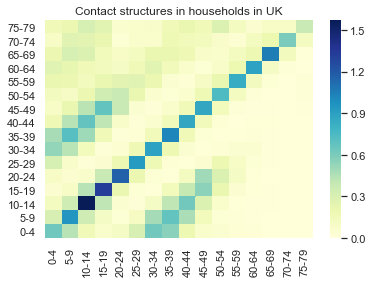

In [8]:
sns.set(font_scale = 1)
sns.heatmap(np.flip(CH, axis=0), annot=False, cmap="YlGnBu",yticklabels=yticklabels,xticklabels=xticklabels ).set_title("Contact structures in households in UK");
# plt.savefig('CH.png', format='png', dpi=200)

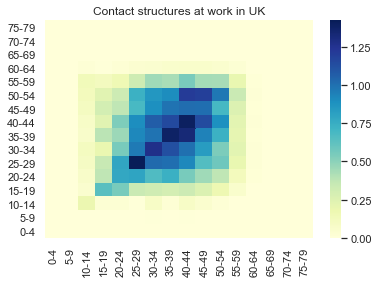

In [9]:
sns.heatmap(np.flip(CW, axis=0), annot=False, cmap="YlGnBu",yticklabels=yticklabels,xticklabels=xticklabels ).set_title("Contact structures at work in UK");
# plt.savefig('CW.png', format='png', dpi=200)

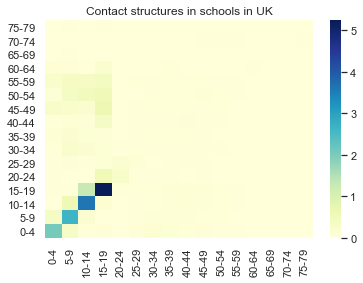

In [12]:
sns.heatmap(np.flip(CS, axis=0), annot=False, cmap="YlGnBu",yticklabels=yticklabels,xticklabels=xticklabels ).set_title("Contact structures in schools in UK");
# plt.savefig('CS.png', format='png', dpi=200)

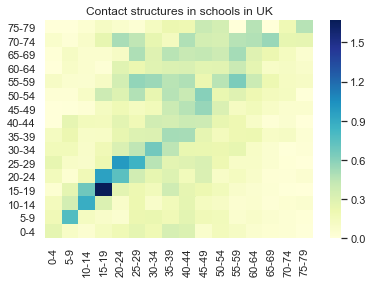

In [20]:
sns.heatmap(np.flip(CO, axis=0), annot=False, cmap="YlGnBu",yticklabels=yticklabels,xticklabels=xticklabels ).set_title("Contact structures in schools in UK");
plt.savefig('C0.png', format='png', dpi=200)

C is the sum of contributions from contacts at home, workplace, schools and all other public spheres. Using superscripts $H$, $W$, $S$ and $O$ for each of these, we write the contact matrix as
$$
C_{ij} = C^H_{ij} + C^W_{ij} + C^S_{ij} + C^O_{ij}
$$

We read in these contact matrices from the data sets provided in the paper *Projecting social contact matrices in 152 countries using contact surveys and demographic data* by Prem et al, sum them to obtain the total contact matrix. We also read in the age distribution of UK obtained from the *Population pyramid* website.

## Covid19 data 

In [23]:
# Get the latest data from Johns Hopkins University
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 24600 (delta 25), reused 34 (delta 19), pack-reused 24548
Receiving objects: 100% (24600/24600), 110.45 MiB | 30.62 MiB/s, done.
Resolving deltas: 100% (13605/13605), done.


In [24]:
cases = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,712,726,736,750,766,773,782,789,795,803
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,738,743,743,743,745,745,747,748,750
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,25,26,27,27,27,27,30,35,35,35


In [25]:
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.shape

(266, 108)

In [26]:
cases[cases['Country/Region']=='United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
217,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,109,109,110,110,111,114,114,114,115,115
218,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,70,70,70,70,73,73,74,74,74,75
219,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,525,525,525,530,537,537,538,543,544,544
220,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,136,141,141,141,141,144,144,144,144,144
221,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,308,308,308,309,313,315,316,320,321,325
222,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,148377,152840,157149,161145,165221,171253,177454,182260,186599,190584
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,11,11,12,12,12,12,12,12,12,12


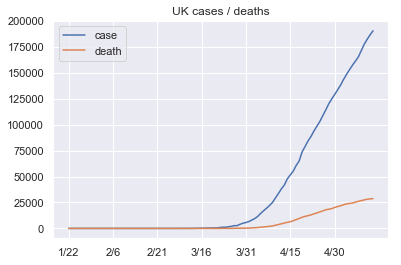

In [27]:
cols = cases.columns.tolist() 
case = cases.loc[223,][4:]
death = deaths.loc[223,][4:]
plt.plot(np.arange(len(case)),case, label= 'case');
plt.plot(np.arange(len(death)),death, label='death');
plt.legend()
# plt.xticks(cols[4:])
plt.title('UK cases / deaths');
plt.xticks(np.arange(0, 100,15), ('1/22', '2/6', '2/21', '3/16', '3/31', '4/15','4/30' ));

No handles with labels found to put in legend.


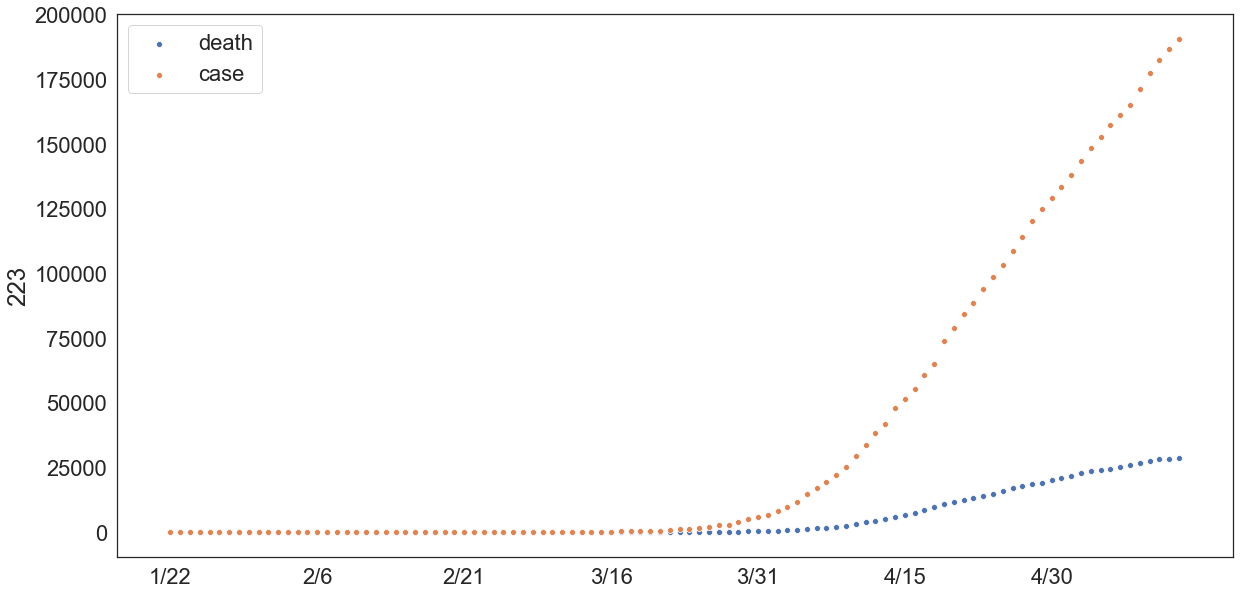

In [47]:
plt.figure(figsize=(20,10))

sns.set_style(style='white')
plt.legend(fontsize='x-large', title_fontsize='1000')
sns.scatterplot(np.arange(len(death)),death, label='death');
sns.scatterplot(x=np.arange(len(case)), y=case, label='case');
plt.xticks(np.arange(0, 100,15), ('1/22', '2/6', '2/21', '3/16', '3/31', '4/15','4/30', '04/05'));

## Deterministc SIR model for UK

Using this code : https://github.com/rajeshrinet/pyross/blob/master/examples/deterministic/ex03-age-structured-SIR-for-India.ipynb

Assume that the population has been partitioned into  $i=1,\ldots, M$ age groups and that we have available the $M\times M$ contact matrix $C_{ij}$.  We assume all initial cases are symptomatic, and remain so.

See SIR model : pyross/deterministic.pyx

In [89]:
# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.SIR(CH, CW, CS, CO)

### Infer  $\beta$  ???

The infection parameter $\beta$ is unknown, so we fit it to the case data till 25th March.  

???

In [267]:
## Parameters that change !

beta  = 0.01646692 # infection rate assumed intrinsic to the pathogen
gIa   = 1./7             # recovery rate of asymptomatic infectives (7 days)
gIs   = 1./7             # recovery rate of symptomatic infectives 
alpha = 0.               # fraction of asymptomatic infectives
fsa   = 1             # the self-isolation parameter   
    
    
# initial conditions    
Is_0 = np.zeros((M));  Is_0[0:15]=100
Ia_0 = np.zeros((M)) # no asymptomatic infectives
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)



In [268]:
sum(Is_0)

1500.0

In [269]:
# matrix for linearised dynamics
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))

for i in range(M):
    for j in range(M):
        L0[i,j]=C[i,j]*Ni[i]/Ni[j]

L[0:M, 0:M]     =    alpha*beta/gIs*L0
L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0


r0 = np.max(np.linalg.eigvals(L))
print("The basic reproductive ratio for these parameters is", r0)

The basic reproductive ratio for these parameters is (1.3462694204918029+0j)


In [270]:
# instantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SIR(parameters, M, Ni)

In [271]:
# the contact structure is independent of time 
def contactMatrix(t):
    return C

In [272]:
# time_points to solve the ode (using odeint) Ti = 0 by default 
Tf=350;  Nf=3500;  #Tf is the final day np.linspace(Ti, Tf, Nf) 
# 1 day = 3

In [273]:
# run model
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)

In [274]:
data['X'].shape # 48 because 16 groups * 4 equations 

(3500, 48)

In [275]:
t = data['t']; IC  = np.zeros((Nf))
for i in range(M):
        IC += data['X'][:,2*M+i]

In [276]:
index_max = np.argmax(IC)
index_max/90

19.966666666666665

In [277]:
max(IC)

1678670.6041404908

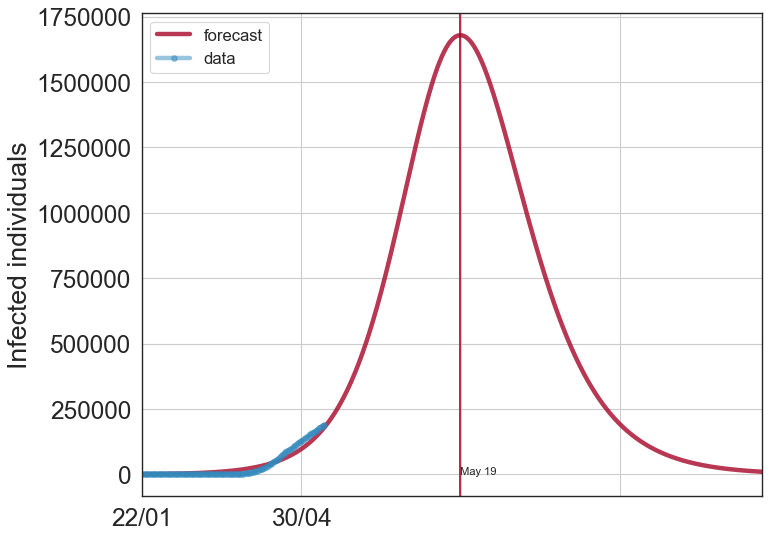

In [278]:

    
        
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)
plt.xticks(np.arange(0, Tf, 90), ('22/01', '30/04'  ));
plt.axvline(x=index_max/10, ymin=0, ymax=175000, color='#A60628')
plt.text(x=index_max/10, y=0, s='May 19', fontsize=10)


day, cases = np.array(np.arange(1,Tf)), np.array(case[0:Tf])


plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=5, label='data', alpha=0.5)
plt.legend(fontsize=15, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals');
# plt.title('No measure');

plt.savefig('FullmatrixC.png', format='png', dpi=200)

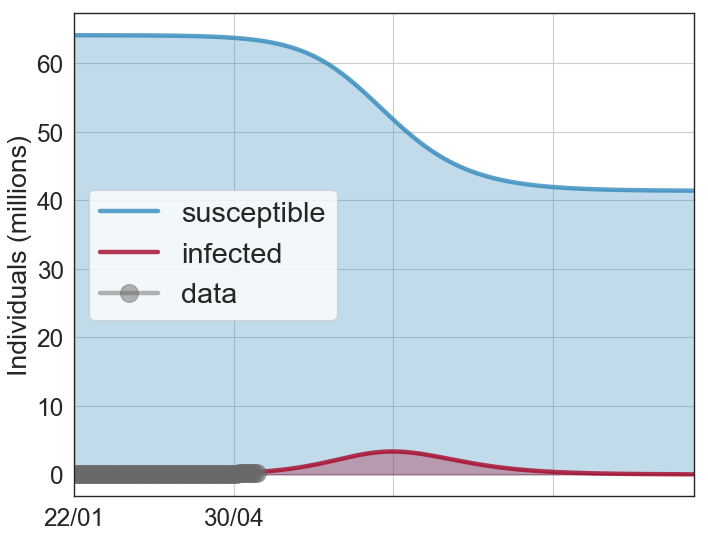

In [279]:
SC  = np.zeros((Nf))
for i in range(M):
        SC += data.get('X')[:,0*M+i]
        IC += data.get('X')[:,2*M+i]

        
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, SC*10**(-6), '-', lw=4, color='#348ABD', label='susceptible', alpha=0.8,)
plt.fill_between(t, 0, SC*10**(-6), color="#348ABD", alpha=0.3)

plt.plot(t, IC*10**(-6), '-', lw=4, color='#A60628', label='infected', alpha=0.8)
plt.fill_between(t, 0, IC*10**(-6), color="#A60628", alpha=0.3)


plt.plot(cases*10**(-6), 'ro-', lw=4, color='dimgrey', ms=16, label='data', alpha=0.5)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Individuals (millions)')


plt.xticks(np.arange(0, Tf, 90), ('22/01', '30/04'  ));

plt.savefig('C-SIRNomesure.png', format='png', dpi=200)


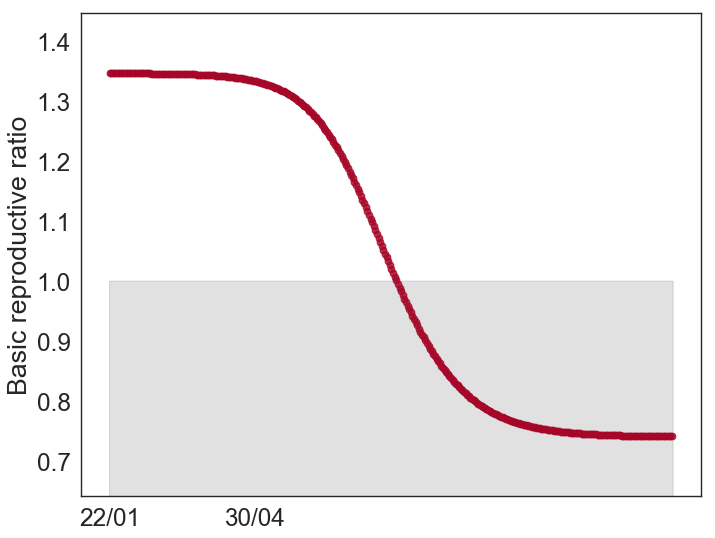

In [280]:
# matrix for linearised dynamics
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
xind=[np.argsort(IC)[-1]]

rr = np.zeros((Tf))

for tt in range(Tf):
    Si = np.array((data['X'][tt*10,0:M])).flatten()
    for i in range(M):
        for j in range(M):
            L0[i,j]=C[i,j]*Si[i]/Ni[j]
    L[0:M, 0:M]     =    alpha*beta/gIs*L0
    L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
    L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
    L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

    rr[tt] = np.real(np.max(np.linalg.eigvals(L)))
    
    
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t[::10], rr, 'o', lw=4, color='#A60628', label='suscetible', alpha=0.8,)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.ylim(np.min(rr)-.1, np.max(rr)+.1)


plt.xticks(np.arange(0, Tf, 90), ('22/01', '30/04'  ));


plt.savefig('C-R0Nomesure.png', format='png', dpi=200)



In [281]:
data.get('X').shape

(3500, 48)

In [282]:
# data.get('X')[0,0:M] day 1 in millions pp 

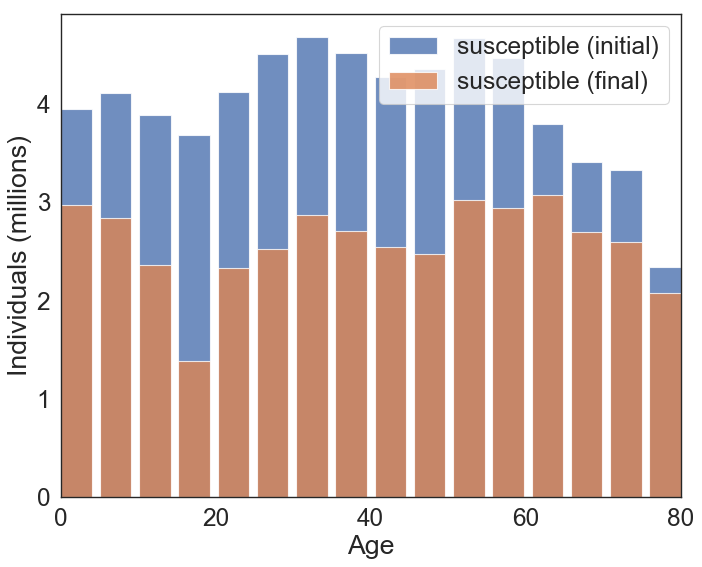

In [283]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.bar(np.arange(16),data.get('X')[0,0:M]*10**(-6),   label='susceptible (initial)', alpha=0.8)
plt.bar(np.arange(16),data.get('X')[-1,0:M]*10**(-6),   label='susceptible (final)', alpha=0.8)

plt.xticks(np.arange(-0.4, 16.45, 3.95), ('0', '20', '40', '60', '80'));
plt.xlim(-0.45, 15.45); plt.ylabel('Individuals (millions)'); plt.xlabel('Age')
plt.legend(fontsize=22); plt.axis('tight')
plt.autoscale(enable=True, axis='x', tight=True)

plt.savefig('C-indsusNomesure.png', format='png', dpi=200)


### Mortality 

We extract the number of susceptibles remaining in each age group, and the difference with the initial number of susceptibles is the total number that are infected. We multiply this with mortality data from China to obtain mortality estimates.



In [284]:
MM = np.array((0,0,.0,1,1,1,1,1,1,3.5,3.5,3.5,3.5,6,6,14.2))  
## Fatality Rate by AGE per 100 cases

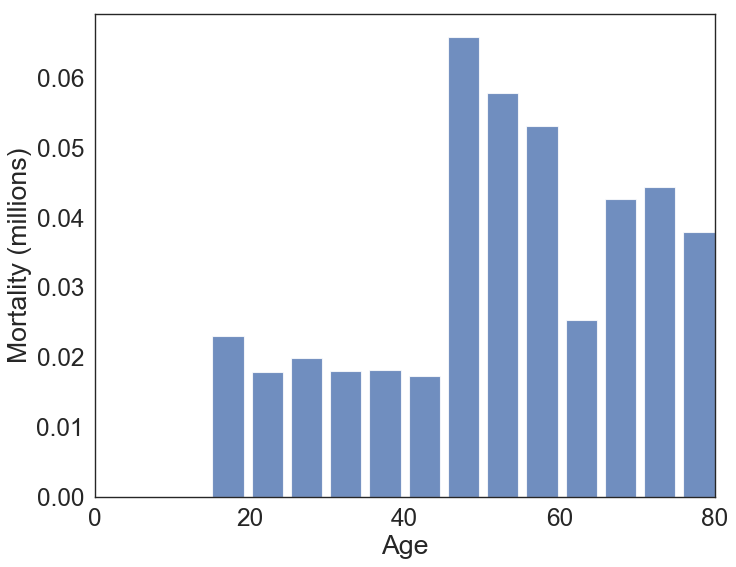

In [285]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data.get('X')[0,0:M]-data['X'][-1,0:M])
plt.bar(np.arange(16),m1*10**(-6),   label='susceptible (final)', alpha=0.8)

plt.axis('tight'); plt.xticks(np.arange(-0.4, 16.45, 3.95), ('0', '20', '40', '60', '80'));
plt.xlim(-0.45, 15.45); plt.ylabel('Mortality (millions)'); plt.xlabel('Age')

plt.autoscale(enable=True, axis='x', tight=True)

plt.savefig('C-mortalityNomesure.png', format='png', dpi=200)


## Non Pharmaceutical intervention

# School closure

Friday, March 20 in UK


###  Change the day to open again schools

In [286]:
dayclosure = 58
dayopen1 = dayclosure+60
dayopen2 = dayclosure+80
dayopen3 = dayclosure+200

In [287]:
model = pyross.deterministic.SIR(parameters, M, Ni)

In [288]:
# the contact matrix is time-dependent
def contactMatrix1(t):
    if t<dayclosure:
        xx = C
    elif dayclosure<=t<dayopen1:
        xx = CH
    else:
        xx = C
    return xx

def contactMatrix2(t):
    if t<dayclosure:
        xx = C
    elif dayclosure<=t<dayopen2:
        xx = CH
    else:
        xx = C
    return xx


def contactMatrix3(t):
    if t<dayclosure:
        xx = C
    elif dayclosure<=t<dayopen3:
        xx = CH
    else:
        xx = C
    return xx

# mod1 = contactMatrix(t, dayopen1)
# mod2 = contactMatrix(t, dayopen2)
# mod3 = contactMatrix(t, dayopen3)

In [289]:
# start simulation
Tf=1000;  Nf=3500 
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix1, Tf, Nf)
data2=model.simulate(S_0, Ia_0, Is_0, contactMatrix2, Tf, Nf)
data3=model.simulate(S_0, Ia_0, Is_0, contactMatrix3, Tf, Nf)

In [290]:
t1 = data['t']; IC1  = np.zeros((Nf))
for i in range(M):
        IC1 += data['X'][:,2*M+i]
        
t2 = data2['t']; IC2 = np.zeros((Nf))
for i in range(M):
        IC2 += data2['X'][:,2*M+i]
        
        
t3 = data3['t']; IC3= np.zeros((Nf))
for i in range(M):
        IC3 += data3['X'][:,2*M+i]

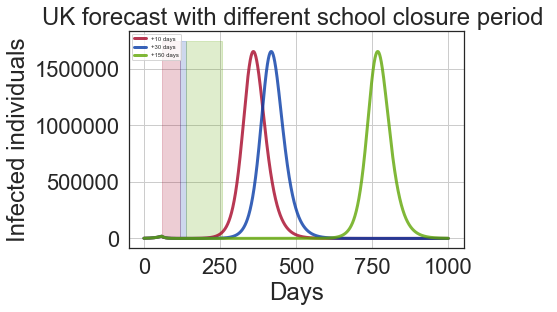

In [291]:
plt.rcParams.update({'font.size': 8})
plt.plot(t1, IC1, '-', lw=3, color='#A60628', label='+10 days', alpha=0.8)
# plt.xticks(np.arange(0, Tf, 15), ('1/22', '2/6', '2/21', '3/16', '3/31', '4/15','4/30' ));
plt.fill_between(np.arange(dayclosure,dayopen1), 0, 1750000, color="#A60628", alpha=0.2)


plt.plot(t2, IC2, '-', lw=3, color='#063ba6', label='+30 days', alpha=0.8)
plt.fill_between(np.arange(dayopen1,dayopen2), 0, 1750000, color="#063ba6", alpha=0.2)



plt.plot(t3, IC3, '-', lw=3, color='#61a606', label='+150 days', alpha=0.8)
plt.fill_between(np.arange(dayopen2,dayopen3), 0, 1750000, color="#61a606", alpha=0.2)

# plt.xticks(np.arange(0, Tf, 30), ('22/01', '21/02', '31/03','30/04' , '30/05','29/06', '28/07' ,'27/08','27/09', '26/10','26/11','25/12' ));

# plt.axvline(x=index_max/10, ymin=0, ymax=175000, color='#A60628')
# plt.text(x=index_max/10, y=0, s='September 7', fontsize=10)

# plt.xticks(np.arange(0, Tf, 90), ('22/01', '30/04'  ));


# day, cases = np.array(np.arange(1,Tf)), np.array(case[0:Tf])


# plt.plot(cases, 'o-', lw=4, color='#348ABD', ms=5, label='data', alpha=0.5)
plt.legend(fontsize=6, loc='upper left'); plt.grid() 
# plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals');
plt.xlabel('Days')
plt.title('UK forecast with different school closure period ');
plt.savefig('UK-forecast-with-different-school-closure-period.png', format='png', dpi=200)


### Look at the numbers per age range

In [292]:
S1= np.zeros((Nf, M))
S2 = np.zeros((Nf, M))
S3 = np.zeros((Nf, M))
I1 = np.zeros((Nf, M))
I2 = np.zeros((Nf, M))
I3 = np.zeros((Nf, M))

for i in range(M):
        S1[:,i] = data.get('X')[:,0*M+i]
        I1[:,i] = data.get('X')[:,2*M+i]
        S2[:,i] = data2.get('X')[:,0*M+i]
        I2[:,i] = data2.get('X')[:,2*M+i]
        S3[:,i] = data3.get('X')[:,0*M+i]
        I3[:,i] = data3.get('X')[:,2*M+i]

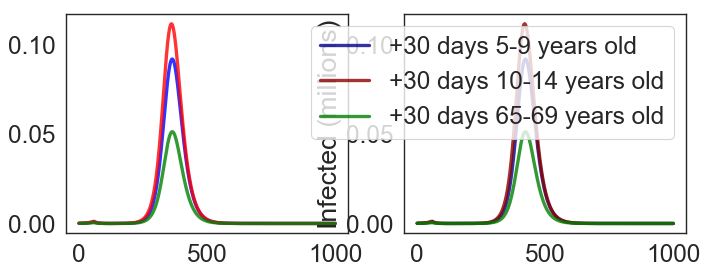

In [320]:
color=['blue','red','green']
color1=['darkblue','darkred','green']
# cm.rainbow(np.linspace(0,1,450))
age = df3.Age.to_list()
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.subplot(2,2,1)
for j,m in enumerate([1, 2 , 13]):
    plt.plot(t1, I1[:,m]*10**(-6), '-', lw=3, color=color[j], label='+10 days '+age[m]+' years old', alpha=0.8)
#     plt.plot(t, I[:,m]*10**(-6), '-', lw=4, color=color[j], label='infected'+age[m], alpha=0.8)

plt.subplot(2,2,2)
for j,m in enumerate([1, 2 , 13]):
    plt.plot(t2, I2[:,m]*10**(-6), '-', lw=3, color=color1[j], label='+30 days '+age[m]+' years old', alpha=0.8)

plt.ylabel('Infected (millions)')
plt.legend();
plt.savefig('UK-forecastI1.png', format='png', dpi=200)

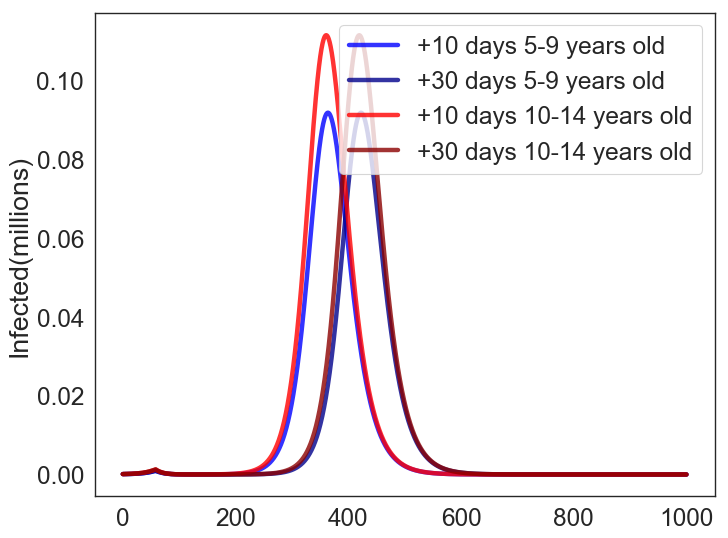

In [305]:
color=['blue','red']
color1=['darkblue','darkred']
# cm.rainbow(np.linspace(0,1,450))
age = df3.Age.to_list()
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

for j,m in enumerate([1, 2]):
    plt.plot(t1, I1[:,m]*10**(-6), '-', lw=4, color=color[j], label='+10 days '+age[m]+' years old', alpha=0.8)
#     plt.plot(t, I[:,m]*10**(-6), '-', lw=4, color=color[j], label='infected'+age[m], alpha=0.8)
    plt.plot(t2,I2[:,m]*10**(-6), '-', lw=4, color=color1[j], label='+30 days '+age[m]+' years old', alpha=0.8)

plt.ylabel('Infected(millions)')
plt.legend();

In [323]:
S1d = pd.DataFrame(S1, columns=df3.Age.to_list()[0:16])
I1d = pd.DataFrame(I1, columns=df3.Age.to_list()[0:16])
S2d = pd.DataFrame(S2, columns=df3.Age.to_list()[0:16])
I2d = pd.DataFrame(I2, columns=df3.Age.to_list()[0:16])
S3d = pd.DataFrame(S3, columns=df3.Age.to_list()[0:16])
I3d = pd.DataFrame(I3, columns=df3.Age.to_list()[0:16])

After the closure day, the total number of infected per category is the same for all closure periods. 

In [372]:
I1d.loc[dayclosure:3499].sum(axis=0)

0-4      2.410893e+07
5-9      3.114112e+07
10-14    3.746860e+07
15-19    5.643126e+07
20-24    4.378750e+07
25-29    4.869922e+07
30-34    4.434016e+07
35-39    4.435956e+07
40-44    4.241816e+07
45-49    4.609829e+07
50-54    4.042611e+07
55-59    3.721181e+07
60-64    1.772573e+07
65-69    1.739962e+07
70-74    1.811319e+07
75-79    6.543213e+06
dtype: float64

In [373]:
I2d.loc[dayclosure:3499].sum(axis=0)

0-4      2.410891e+07
5-9      3.114109e+07
10-14    3.746857e+07
15-19    5.643123e+07
20-24    4.378747e+07
25-29    4.869918e+07
30-34    4.434013e+07
35-39    4.435953e+07
40-44    4.241813e+07
45-49    4.609826e+07
50-54    4.042608e+07
55-59    3.721178e+07
60-64    1.772571e+07
65-69    1.739960e+07
70-74    1.811318e+07
75-79    6.543207e+06
dtype: float64

In [374]:
I3d.loc[dayclosure:3499].sum(axis=0)

0-4      2.408093e+07
5-9      3.110470e+07
10-14    3.743047e+07
15-19    5.639728e+07
20-24    4.374994e+07
25-29    4.865425e+07
30-34    4.429559e+07
35-39    4.431570e+07
40-44    4.237719e+07
45-49    4.605671e+07
50-54    4.038567e+07
55-59    3.717342e+07
60-64    1.770448e+07
65-69    1.737915e+07
70-74    1.809286e+07
75-79    6.535109e+06
dtype: float64

The impact on the number of infected per category during the closure period. 

In [381]:
I1d.loc[1:dayclosure, ['60-64','65-69','70-74','75-79']].mean(axis=0)

60-64    7.293214
65-69    3.351397
70-74    3.600116
75-79    1.230057
dtype: float64

In [380]:
I1d.loc[dayclosure:dayopen1, ['60-64','65-69','70-74','75-79']].mean(axis=0)

60-64     9.837504
65-69     9.443222
70-74    10.310774
75-79     3.420831
dtype: float64

In [382]:
I1d.loc[dayopen1:, ['60-64','65-69','70-74','75-79']].mean(axis=0)

60-64    5241.023754
65-69    5144.604997
70-74    5355.581320
75-79    1934.656823
dtype: float64

In [387]:
list_eld = ['60-64','65-69','70-74','75-79']
list_young =  ['0-4','5-9','10-14', '15-19']
day = dayopen1

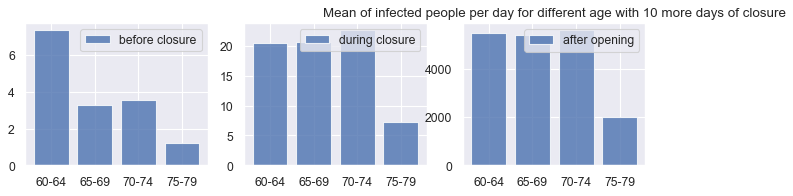

In [417]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,3,1)
plt.bar(list_eld,I1d.loc[:dayclosure, list_eld].mean(axis=0), label='before closure', alpha=0.8);
plt.legend();
plt.subplot(3,3,2)
plt.bar(list_eld,I1d.loc[dayclosure:day, list_eld].mean(axis=0),label='during closure', alpha=0.8);
plt.legend();
plt.subplot(3,3,3)
plt.bar(list_eld,I1d.loc[day:, list_eld].mean(axis=0),   label='after opening', alpha=0.8);
plt.legend();

plt.title('Mean of infected people per day for different age with 10 more days of closure');


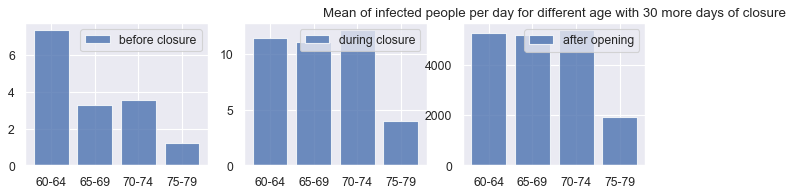

In [420]:
day = dayopen2
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,3,1)
plt.bar(list_eld,I2d.loc[:dayclosure, list_eld].mean(axis=0), label='before closure', alpha=0.8);
plt.legend();
plt.subplot(3,3,2)
plt.bar(list_eld,I2d.loc[dayclosure:day, list_eld].mean(axis=0),label='during closure', alpha=0.8);
plt.legend();
plt.subplot(3,3,3)
plt.bar(list_eld,I2d.loc[day:, list_eld].mean(axis=0),   label='after opening', alpha=0.8);
plt.legend();

plt.title('Mean of infected people per day for different age with 30 more days of closure');


In [366]:
I1d.loc[dayopen1:3499, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    1.772614e+07
65-69    1.739980e+07
70-74    1.811339e+07
75-79    6.543282e+06
dtype: float64

In [367]:
I2d.loc[1:3499, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    1.772613e+07
65-69    1.739979e+07
70-74    1.811338e+07
75-79    6.543276e+06
dtype: float64

In [368]:
I3d.loc[1:3499, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    1.770489e+07
65-69    1.737934e+07
70-74    1.809307e+07
75-79    6.535178e+06
dtype: float64

In [346]:
I1d.loc[dayclosure:dayopen1, ['0-4','5-9','10-14', '15-19']].sum(axis=0)

0-4       795.119160
5-9      1001.770243
10-14    1424.143579
15-19    3236.121048
dtype: float64

In [355]:
I3d.loc[dayclosure:dayopen1, ['0-4','5-9','10-14', '15-19']].sum(axis=0)

0-4       795.119160
5-9      1001.770243
10-14    1424.143579
15-19    3236.121048
dtype: float64

In [360]:
I1d.loc[2100:2102, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    532.100099
65-69    512.425273
70-74    508.953480
75-79    202.912154
dtype: float64

In [361]:
I2d.loc[2100:2102, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    4559.055479
65-69    4391.339922
70-74    4364.819070
75-79    1737.107320
dtype: float64

In [362]:
I3d.loc[2100:2102, ['60-64','65-69','70-74','75-79']].sum(axis=0)

60-64    17.335728
65-69    17.447558
70-74    19.223322
75-79     6.316790
dtype: float64

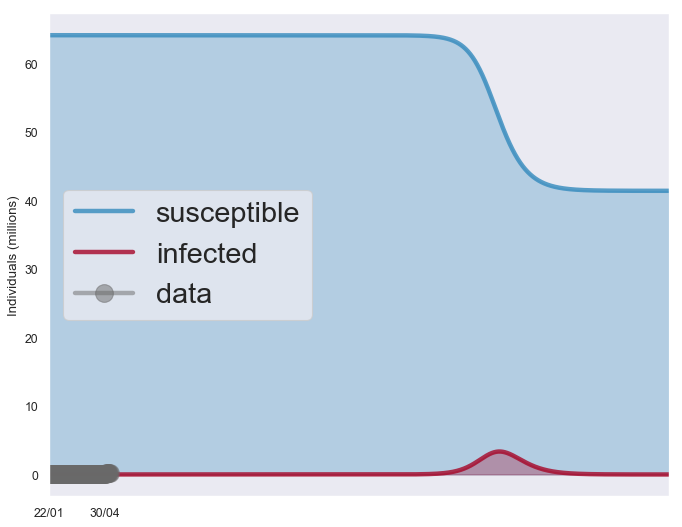

In [646]:
SC  = np.zeros((Nf))
for i in range(M):
        SC += data.get('X')[:,0*M+i]
        IC += data.get('X')[:,2*M+i]

        
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, SC*10**(-6), '-', lw=4, color='#348ABD', label='susceptible', alpha=0.8,)
plt.fill_between(t, 0, SC*10**(-6), color="#348ABD", alpha=0.3)

plt.plot(t, IC*10**(-6), '-', lw=4, color='#A60628', label='infected', alpha=0.8)
plt.fill_between(t, 0, IC*10**(-6), color="#A60628", alpha=0.3)


plt.plot(cases*10**(-6), 'ro-', lw=4, color='dimgrey', ms=16, label='data', alpha=0.5)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Individuals (millions)')



# plt.xticks(np.arange(0, Tf, 30), ('22/01', '21/02', '31/03','30/04' , '30/05','29/06', '28/07' ,'27/08','27/09', '26/10','26/11','25/12' ));
# plt.savefig('model4-SIR.png', format='png', dpi=200)


In [634]:
# matrix for linearised dynamics
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))
xind=[np.argsort(IC)[-1]]

rr = np.zeros((Tf))

for tt in range(Tf):
    Si = np.array((data['X'][tt*10,0:M])).flatten()
    for i in range(M):
        for j in range(M):
            L0[i,j]=C[i,j]*Si[i]/Ni[j]
    L[0:M, 0:M]     =    alpha*beta/gIs*L0
    L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
    L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
    L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0

    rr[tt] = np.real(np.max(np.linalg.eigvals(L)))
    
    
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t[::10], rr, 'o', lw=4, color='#A60628', label='suscetible', alpha=0.8,)
plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.ylim(np.min(rr)-.1, np.max(rr)+.1)

plt.xticks(np.arange(0, Tf, 90), ('22/01', '30/04'  ));

# plt.xticks(np.arange(0, Tf, 30), ('22/01', '21/02', '31/03','30/04' , '30/05','29/06', '28/07' ,'27/08','27/09', '26/10','26/11','25/12' ));
plt.savefig('model3Ro.png', format='png', dpi=200)



IndexError: index 3500 is out of bounds for axis 0 with size 3500

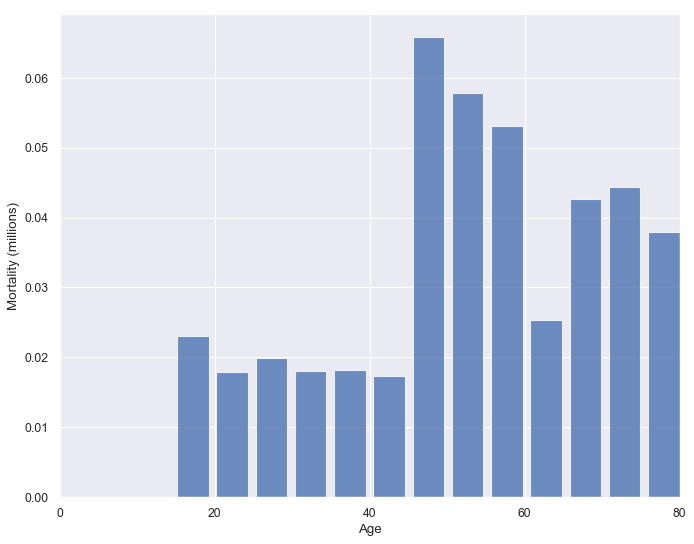

In [647]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

m1 = .01*MM*(data.get('X')[0,0:M]-data['X'][-1,0:M])
plt.bar(np.arange(16),m1*10**(-6),   label='susceptible (final)', alpha=0.8)

plt.axis('tight'); plt.xticks(np.arange(-0.4, 16.45, 3.95), ('0', '20', '40', '60', '80'));
plt.xlim(-0.45, 15.45); plt.ylabel('Mortality (millions)'); plt.xlabel('Age')

plt.autoscale(enable=True, axis='x', tight=True)

plt.savefig('model4mortality.png', format='png', dpi=200)

In [252]:
beta  = 0.036692            # infection rate 

gIa   = 1./7                # recovery rate of asymptomatic infectives 
gIs   = 1./7                # recovery rate of symptomatic infectives 

alpha = 0.3                 # fraction of asymptomatic infectives 
fsa   = 0.2                   # the self-isolation parameter   

sa    = 100*np.ones(M)      # arrival of new susceptibles
sa[0] = 1500

iaa   = 10*np.ones(M)       # daily arrival of new  asymptomatics
ep    = 0.01                # fraction of recovered who is susceptible



# initial conditions    
Is_0 = np.zeros((M));  Is_0[6:13]=8;  Is_0[2:6]=4; Is_0[13:16]=4

Ia_0 = np.zeros((M));  Ia_0[6:13]=4;  Ia_0[2:6]=2; Ia_0[13:16]=2
R_0  = np.zeros((M))
S_0  = Ni - (Ia_0 + Is_0 + R_0)


# matrix for linearised dynamics
L0 = np.zeros((M, M))
L  = np.zeros((2*M, 2*M))

for i in range(M):
    for j in range(M):
        L0[i,j]=C[i,j]*Ni[i]/Ni[j]

L[0:M, 0:M]     =    alpha*beta/gIs*L0
L[0:M, M:2*M]   = fsa*alpha*beta/gIs*L0
L[M:2*M, 0:M]   =    ((1-alpha)*beta/gIs)*L0
L[M:2*M, M:2*M] = fsa*((1-alpha)*beta/gIs)*L0


r0 = np.max(np.linalg.eigvals(L))
print("The basic reproductive ratio for these parameters is", r0)

The basic reproductive ratio for these parameters is (1.319908017634234+0j)


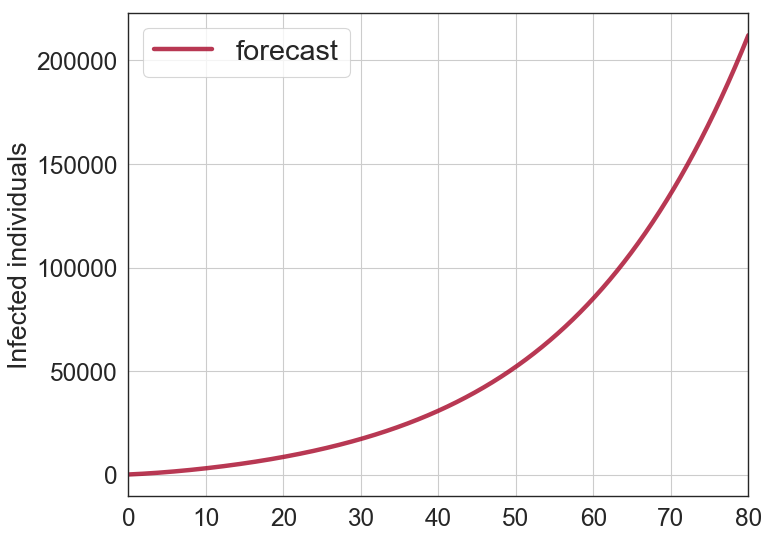

In [253]:
# duration of simulation and data file
Tf=80;  Nf=2000;  



# intantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,'fsa':fsa, 'sa':sa, 'iaa':iaa, 'ep':ep}
model = pyross.deterministic.SIRS(parameters, M, Ni)



# the contact structure is independent of time 
def contactMatrix(t):
    return C
# run model
data=model.simulate(S_0, Ia_0, Is_0, contactMatrix, Tf, Nf)


t = data['t']; IC  = np.zeros((Nf))
for i in range(2*M):
        IC += data['X'][:,M+i]
        

        
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.plot(t, IC, '-', lw=4, color='#A60628', label='forecast', alpha=0.8)

 
plt.legend(fontsize=26, loc='upper left'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Infected individuals'); #plt.xlim(0, 40); plt.ylim(0, 